## Frequency-Wavenumber analysis of DAS data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dasquakes import *

In [53]:
ft,f,k = fk_analysis(t0=datetime.datetime(2022, 5, 17, 11, 16, 0),draw_figure=False,
                     downsamplefactor=1,
                     record_length=2)

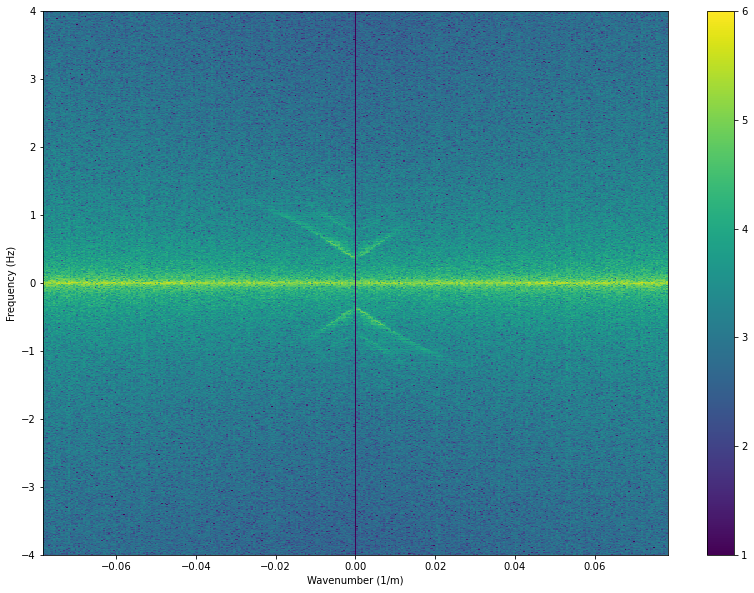

In [54]:
plt.subplots(figsize=(14,10))
c=plt.pcolormesh(k,f,np.log10(np.abs(ft)),vmin=1,vmax = 6)
plt.colorbar(c)
plt.xlabel('Wavenumber (1/m)')
plt.ylabel('Frequency (Hz)')
plt.ylim([-4,4])
plt.show()

## Data parameters

In [46]:
cable='seadasn'
record_length = 3 #minutes
t0 = datetime.datetime(2022, 5, 2, 0, 0, 0)

In [47]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

## Acquisition parameters

In [48]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 18000, Number of channels: 1749
Nyquist Frequency: 50.0 Hz, cable length: 11160.285674571991 m


## Plots

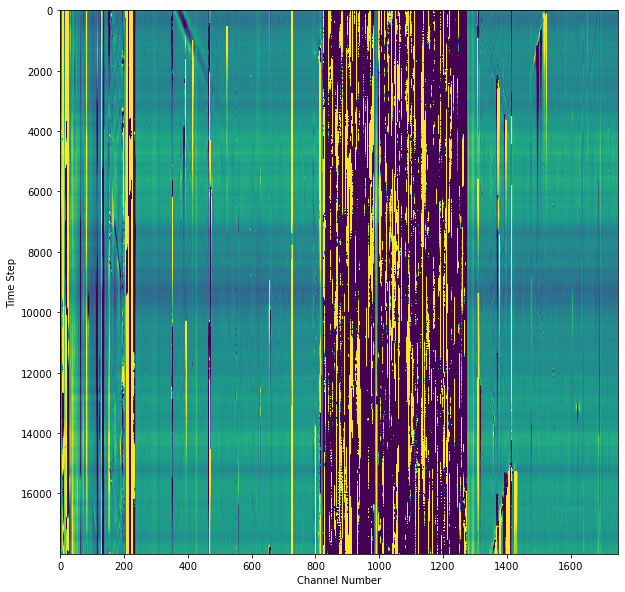

In [49]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.show()